In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [108]:
def area_paracaidas(m,Cd,rho,v):
    g=9.806 #m/s
    return (2*g*m)/(rho*Cd*v**2)

def error_division(cte,x,y, e_x,e_y):
    return abs(cte*x/y)*(e_x/abs(x)+e_y/abs(y))

def ancho_Cruciforme(A,LWR):
    W=np.sqrt(A/(2*LWR-1))
    return W

def densidad_aire(h):
    # Definición de constantes
    rho_0 = 1.225  # kg/m^3
    g = 9.81  # m/s^2
    M = 0.02897  # kg/mol
    R = 8.3144598  # J/mol·K
    T0 = 288.15  # K

    rho = rho_0 * np.exp(-g * M * h / (R * T0))
    return rho

def Do(L,LWR):
    return 2*L/LWR*np.sqrt((2*LWR-1)/np.pi) # Poner la ecuacion en las notas

def diametro(A):
    return np.sqrt((4*A)/np.pi)

CD_LWR = lambda x: 2.75- 1.4*x + 0.34*x**2 -0.03*x**3

In [109]:
g=9.806 # m/s
m=50 #+-5 Kg
rho=1.225 #kg/m^3
Cd1= .73 # +-0.1 Cruciform LWR=3.5
Dp_Do=0.69 #
Cd2= 0.775 # +-0.175 Circular 
v1=10 # m/s o menor
v2=20.45 # m/s
a1=2*g/(rho*v1**2)
a2=2*g/(rho*v2**2)

In [110]:
A1=area_paracaidas(m,CD_LWR(3.2),densidad_aire(500),v1) #área cruciforma LWD=3.2

error_A1=error_division(a1,m,CD_LWR(3.2),0.1,0.175)

A2=area_paracaidas(m,CD_LWR(3.5),densidad_aire(500),v1) #área cruciforma LWD=3.5
error_A2=error_division(a1,m,CD_LWR(3.5),0.1,0.175)

A3=area_paracaidas(m,CD_LWR(3.8),densidad_aire(500),v1) #área cruciforma LWD=3.8
error_A3=error_division(a1,m,CD_LWR(3.8),0.1,0.175)

AS=area_paracaidas(m,Cd2,rho,v2) #área semielipse
error_AS=error_division(a2,m,Cd2,0.1,0.175)

Total=A1+A2

In [111]:
print(A1)

11.051887073999872


In [112]:
np.sqrt(Total) # Lado de un solo pliego pero no es lo que se necesita

4.765240212667097

In [113]:
#Definición de tabla para visualización

df = pd.DataFrame()

areas=[A1,A2,A3,AS]
Diametro=np.array([diametro(A1), diametro(A2), diametro(A3), diametro(AS)])
errores=[error_A1,error_A2,error_A3, error_AS]
ratio=[error_A1/A1,error_A2/A2,error_A3/A3,error_AS/AS]
Cd=[CD_LWR(3.2),CD_LWR(3.5),CD_LWR(3.8),Cd2]
df['Cd']=Cd
df['Areas m^2']=areas
df['Diametro']=Diametro
df['D. inflado'] = 0.72*Diametro
df['Altura'] = (1-0.72)/2*Diametro
df['Error']=errores
df['Relación']=ratio
print(df)


        Cd  Areas m^2  Diametro  D. inflado    Altura     Error  Relación
0  0.76856  11.051887  3.751226    2.700883  0.525172  2.392414  0.216471
1  0.72875  11.655627  3.852325    2.773674  0.539325  2.659738  0.228193
2  0.69344  12.249132  3.949187    2.843415  0.552886  2.936326  0.239717
3  0.77500   2.469832  1.773327    1.276795  0.248266  0.562644  0.227806


In [114]:
df

,Cd,Areas m^2,Diametro,D. inflado,Altura,Error,Relación
0,0.76856,11.051887,3.751226,2.700883,0.525172,2.392414,0.216471
1,0.72875,11.655627,3.852325,2.773674,0.539325,2.659738,0.228193
2,0.69344,12.249132,3.949187,2.843415,0.552886,2.936326,0.239717
3,0.77500,2.469832,1.773327,1.276795,0.248266,0.562644,0.227806


## Geometria del cruciforme

In [115]:


LWR1=3.2
LWR2=3.5
LWR3=3.8
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W
print(L,W) # metros

4.577952874977075 1.4306102734303359


## Cruva del paracaidas

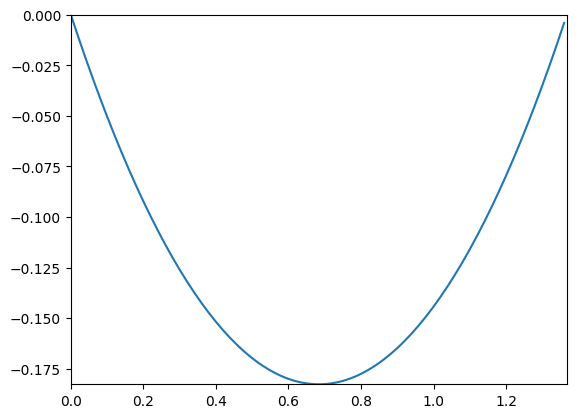

In [116]:
#def curva_paracaidas(A1,Theta,x):
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W

Fd=densidad_aire(500)*v1**2*CD_LWR(3.2)/2
dT=m*g/4*ancho_Cruciforme(A1, LWR1) #Tension
Theta= 3*np.pi/4+np.pi/8
T0=dT*np.cos(Theta)
Gamma=dT*1.01/(W*T0)
a=np.arcsinh(W/2*Gamma)/Gamma
h=(np.cosh(Gamma*a)-1)/Gamma
x=np.arange(0,2*a, .01)
y= (np.cosh(Gamma*(x-a))-np.cosh(Gamma*a))/Gamma
#    return y

plt.plot(x,-y)
plt.ylim(h,0)
plt.xlim(0,2*a)
plt.show()

In [117]:
print(2*a,2*a/W, W, h, Fd, dT)

1.3675297940839866 0.9559065941871827 1.4306102734303359 -0.1827370353402244 44.363464512178716 175.3570542657234


In [118]:
len(x)

137